In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load oil price  data
df = pd.read_csv("/content/drive/MyDrive/oil_price.csv")


# Display first five rows
print("First Five rows of oil data\n")
display(df.head())

# Display last five rows
print("Last Five rows of oil data\n")
display(df.tail())

print("No of rows and columns\n")
display(df.shape)

# Drop rows where both 'Date' and 'Price' are NaN
df = df.dropna(how='all')

# Again Display last five rows
print("Last Five rows of oil data\n")
display(df.tail())

First Five rows of oil data



,Date,Price
0,"Jul 01, 2020",42.18
1,"Jul 02, 2020",43.19
2,"Jul 03, 2020",42.92
3,"Jul 06, 2020",42.73
4,"Jul 07, 2020",43.28


Last Five rows of oil data



,Date,Price
1225,NaN,NaN
1226,NaN,NaN
1227,NaN,NaN
1228,NaN,NaN
1229,NaN,NaN


No of rows and columns



(1230, 2)

Last Five rows of oil data



,Date,Price
630,"Dec 22, 2022",79.58
631,"Dec 23, 2022",82.45
632,"Dec 28, 2022",81.70
633,"Dec 29, 2022",80.96
634,"Dec 30, 2022",82.82


In [ ]:
# Summary statistics
summary_stats = df.describe()

print("Summary Statistics for Oil Price:\n")
print(summary_stats)


Summary Statistics for Oil Price:

            Price
count  635.000000
mean    77.214110
std     23.898162
min     36.330000
25%     61.130000
50%     75.500000
75%     94.275000
max    133.180000


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)


# Visualizing Daily Oil Prices (July 2020 – December 2022)

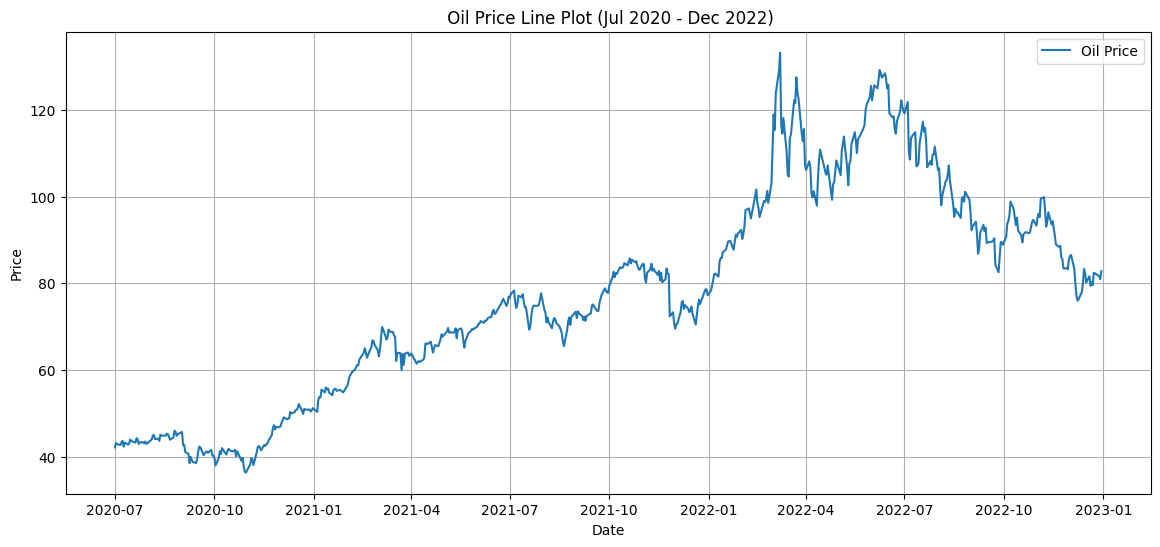

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Oil Price')
plt.title(' Oil Price Line Plot (Jul 2020 - Dec 2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Rolling Mean and Standard Deviation Plot

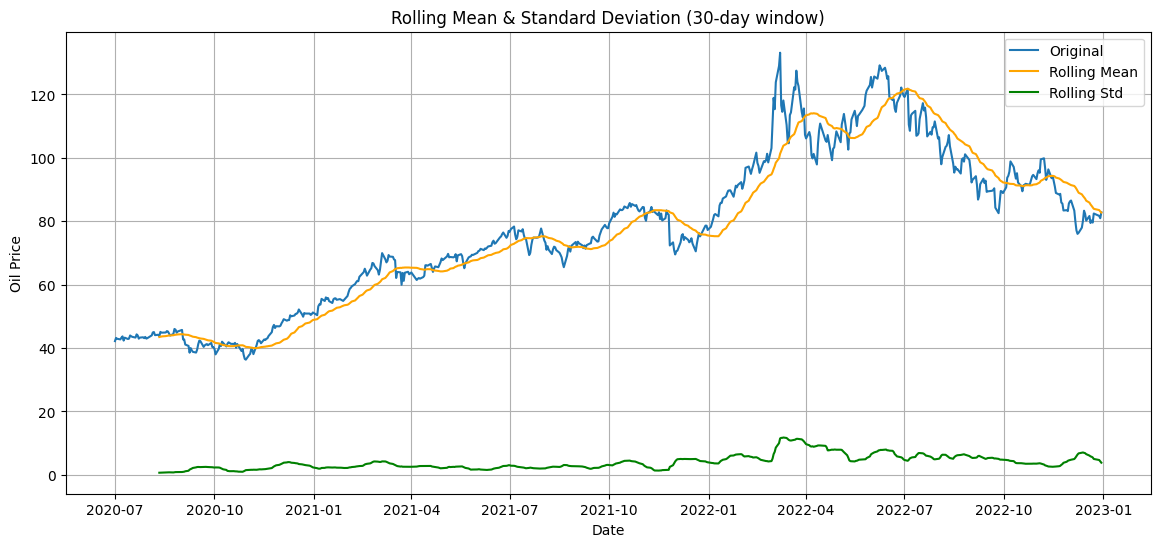

In [ ]:
rolling_mean = df['Price'].rolling(window=30).mean()
rolling_std = df['Price'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation (30-day window)')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()


# Testing for Stationarity(ADF Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test
def adfuller_test(series, title):
    print(f"\nADF Test for Oil Price")
    print("-" * 50)
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")

    # Check stationarity
    p_value = result[1]
    if p_value <= 0.05:
        print("Reject Null Hypothesis: The data is stationary")
    else:
        print("Accept Null Hypothesis: The data is NOT stationary")

# Perform ADF test
adfuller_test(df['Price'], "Original Series")



ADF Test for Oil Price
--------------------------------------------------
ADF Test Statistic : -1.598608589550151
p-value : 0.48429238915100054
#Lags Used : 16
Number of Observations Used : 618
Accept Null Hypothesis: The data is NOT stationary


# Kwiatkowski-Phillips-Schmidt-Shin test(KPSS)

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kwargs):
    statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

    if p_value < 0.05:
        print("\n=> The series is likely **non-stationary** (reject null hypothesis).")
    else:
        print("\n=> The series is likely **stationary** (fail to reject null hypothesis).")

kpss_test(df['Price'], regression='c')

KPSS Statistic: 3.126095936766106
p-value: 0.01
Num Lags: 16
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

=> The series is likely **non-stationary** (reject null hypothesis).


#  ACF and PACF Plots

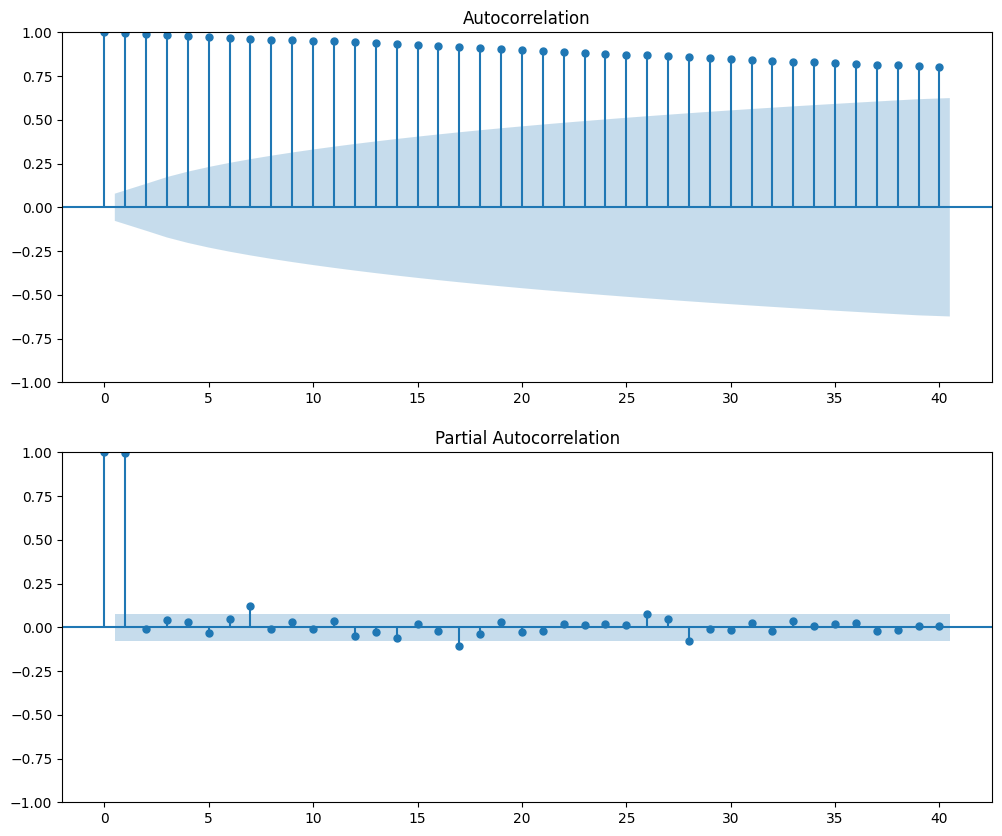

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1, figsize=(12,10))
plot_acf(df['Price'], ax=ax[0], lags=40)
plot_pacf(df['Price'], ax=ax[1], lags=40)
plt.show()

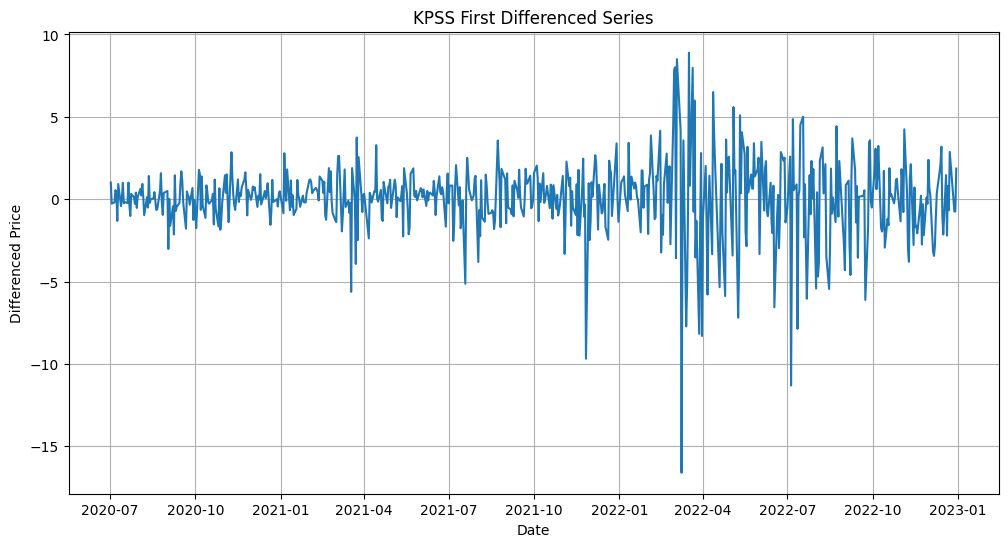

KPSS Statistic: 0.13865728844078457
p-value: 0.1
Num Lags: 2
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

=> The series is likely **stationary** (fail to reject null hypothesis).


In [ ]:
# First Difference
df_diff = df['Price'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('KPSS First Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.grid(True)
plt.show()

# KPSS test on the differenced series
kpss_test(df_diff, regression='c')


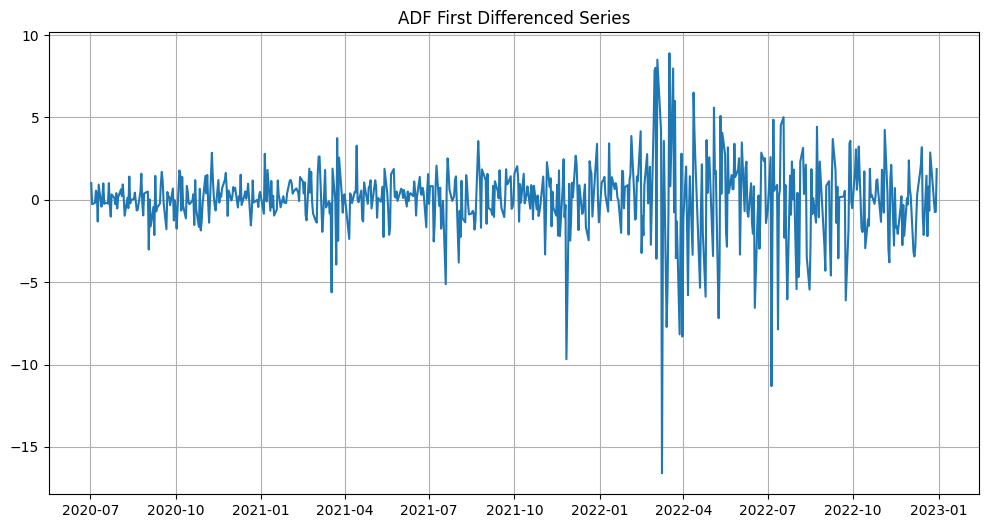


ADF Test for Oil Price
--------------------------------------------------
ADF Test Statistic : -5.278578124041285
p-value : 6.0637563460194175e-06
#Lags Used : 15
Number of Observations Used : 618
Reject Null Hypothesis: The data is stationary


In [ ]:
# First difference
df_diff = df['Price'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('ADF First Differenced Series')
plt.grid(True)
plt.show()

adfuller_test(df_diff, '1st Difference')



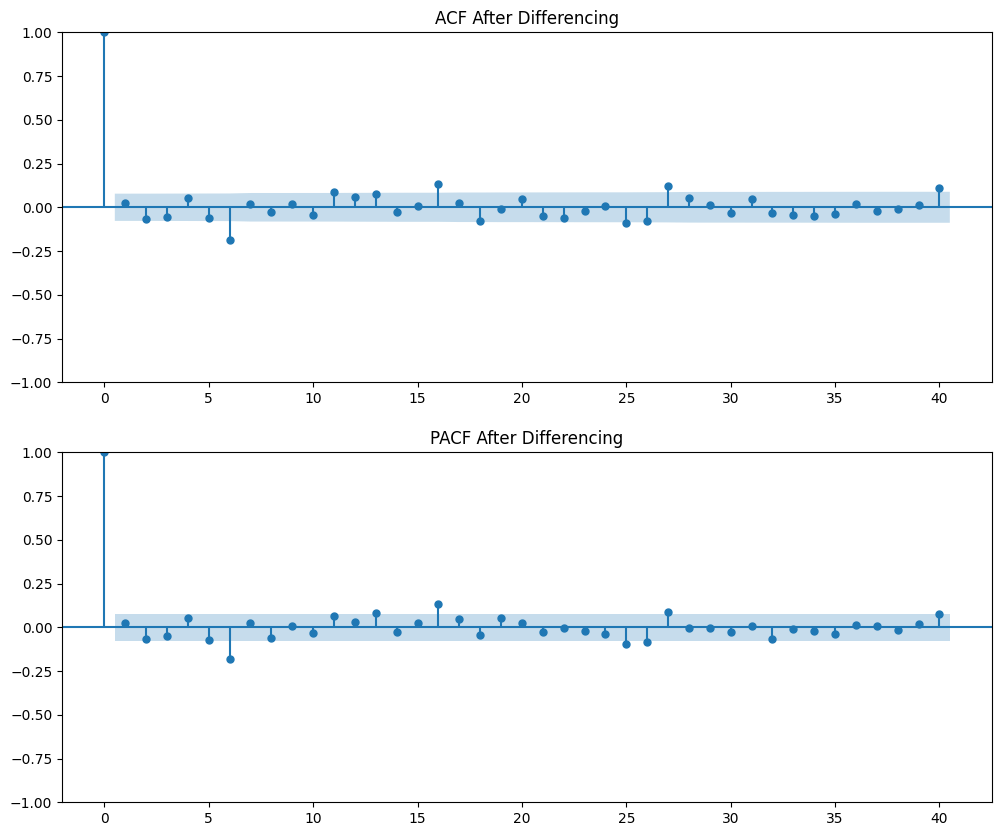

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1, figsize=(12,10))
plot_acf(df_diff, ax=ax[0], lags=40)
ax[0].set_title("ACF After Differencing")

plot_pacf(df_diff, ax=ax[1], lags=40)
ax[1].set_title("PACF After Differencing")

plt.show()

# Loop Over (p,d,q) to Find Best ARIMA Model via AIC


In [ ]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppress ARIMA convergence warnings
warnings.filterwarnings("ignore")

df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'])

# Initialize list to store (p,d,q) and AIC
aic_values = []

# Search best ARIMA model via AIC
for p in range(0, 9):
    for d in range(0, 3):
        for q in range(0, 9):
            try:
                model = ARIMA(df['Price'], order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                aic_values.append(((p, d, q), aic))
                print(f"ARIMA({p},{d},{q}) AIC: {aic:.2f}")
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) failed: {e}")
                continue

# Select best model based on AIC
if aic_values:
    best_model = sorted(aic_values, key=lambda x: x[1])[0]
    best_order = best_model[0]
    best_aic = best_model[1]
    print("\n Best ARIMA parameters:", best_order)
    print(" Best AIC:", best_aic)
else:
    print("No model could be successfully fitted. Check your data.")


ARIMA(0,0,0) AIC: 5835.78
ARIMA(0,0,1) AIC: 5022.87
ARIMA(0,0,2) AIC: 4444.60
ARIMA(0,0,3) AIC: 4011.92
ARIMA(0,0,4) AIC: 3815.91
ARIMA(0,0,5) AIC: 3598.46
ARIMA(0,0,6) AIC: 3474.51
ARIMA(0,0,7) AIC: 3369.70
ARIMA(0,0,8) AIC: 3511.77
ARIMA(0,1,0) AIC: 2835.10
ARIMA(0,1,1) AIC: 2836.59
ARIMA(0,1,2) AIC: 2836.21
ARIMA(0,1,3) AIC: 2834.37
ARIMA(0,1,4) AIC: 2835.42
ARIMA(0,1,5) AIC: 2835.04
ARIMA(0,1,6) AIC: 2817.93
ARIMA(0,1,7) AIC: 2818.73
ARIMA(0,1,8) AIC: 2820.63
ARIMA(0,2,0) AIC: 3252.98
ARIMA(0,2,1) AIC: 2839.58
ARIMA(0,2,2) AIC: 2841.03
ARIMA(0,2,3) AIC: 2840.73
ARIMA(0,2,4) AIC: 2838.95
ARIMA(0,2,5) AIC: 2839.97
ARIMA(0,2,6) AIC: 2839.62
ARIMA(0,2,7) AIC: 2822.17
ARIMA(0,2,8) AIC: 2823.07
ARIMA(1,0,0) AIC: 2846.81
ARIMA(1,0,1) AIC: 2848.22
ARIMA(1,0,2) AIC: 2848.02
ARIMA(1,0,3) AIC: 2846.41
ARIMA(1,0,4) AIC: 2847.33
ARIMA(1,0,5) AIC: 2847.12
ARIMA(1,0,6) AIC: 2830.38
ARIMA(1,0,7) AIC: 2830.97
ARIMA(1,0,8) AIC: 2833.06
ARIMA(1,1,0) AIC: 2836.66
ARIMA(1,1,1) AIC: 2838.13
ARIMA(1,1,2)

# Best ARIMA MOdel

In [ ]:
best_order = best_model[0]
final_model = ARIMA(df['Price'], order=best_order)
final_results = final_model.fit()
print(final_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  635
Model:                 ARIMA(6, 1, 7)   Log Likelihood               -1390.191
Date:                Sun, 06 Jul 2025   AIC                           2808.382
Time:                        15:19:33   BIC                           2870.711
Sample:                             0   HQIC                          2832.585
                                - 635                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0722      0.092      0.787      0.431      -0.108       0.252
ar.L2          0.4186      0.096      4.375      0.000       0.231       0.606
ar.L3          0.0032      0.051      0.062      0.9

# Plot Forecast + Confidence Interval

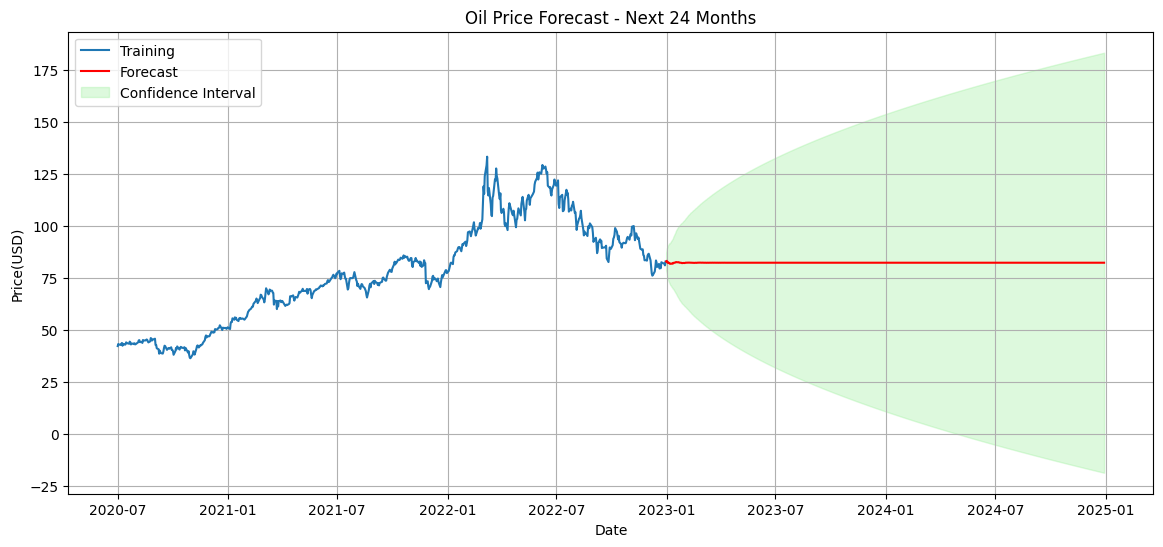

In [ ]:
# Forecast 730 days (2 years daily)
forecast_result = final_results.get_forecast(steps=730)

# Extract forecast and confidence intervals
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Create future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=730)

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Training')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1],label='Confidence Interval', color='lightgreen', alpha=0.3)
plt.title(f'Oil Price Forecast - Next 24 Months')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
# Load EIA Brent spot price data from Excel file
eia_brent_df = pd.read_excel("/content/drive/MyDrive/RBRTEd.xls", sheet_name="Data 1", skiprows=2)
eia_brent_df = eia_brent_df[['Date', 'Europe Brent Spot Price FOB (Dollars per Barrel)']]
eia_brent_df.columns = ['Date', 'Europe_Brent_Spot_Price_FOB']
eia_brent_df.dropna(inplace=True)

# Convert date column and set as index
eia_brent_df['Date'] = pd.to_datetime(eia_brent_df['Date'])
eia_brent_df.set_index('Date', inplace=True)

# Filter EIA actual prices to match the forecast range
actual_future = eia_brent_df.loc['2023-01-01':'2024-12-31']
actual_future = actual_future.asfreq('D')



In [ ]:
# Convert ARIMA forecast output into a DataFrame for comparison
forecast_df = pd.DataFrame({'Forecast': forecast.values}, index=future_dates)


# Combine forecasted values with actual EIA data for the same period
comparison_df = pd.merge(
    forecast_df.rename(columns={"Forecast": "Forecast"}),
    actual_future.rename(columns={"Europe_Brent_Spot_Price_FOB": "Actual"}),
    left_index=True, right_index=True,
    how='inner'
)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop any rows with missing values before evaluation
comparison_df.dropna(inplace=True)

# Calculate evaluation metrics
rmse_out = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Forecast']))
mae_out = mean_absolute_error(comparison_df['Actual'], comparison_df['Forecast'])
r2_out = r2_score(comparison_df['Actual'], comparison_df['Forecast'])

# Print results
print("Performance on Future Data:")
print(f"RMSE: {rmse_out:.2f}")
print(f"MAE : {mae_out:.2f}")
print(f"R²  : {r2_out:.4f}")



Performance on Future Data:
RMSE: 5.89
MAE : 4.88
R²  : -0.0133


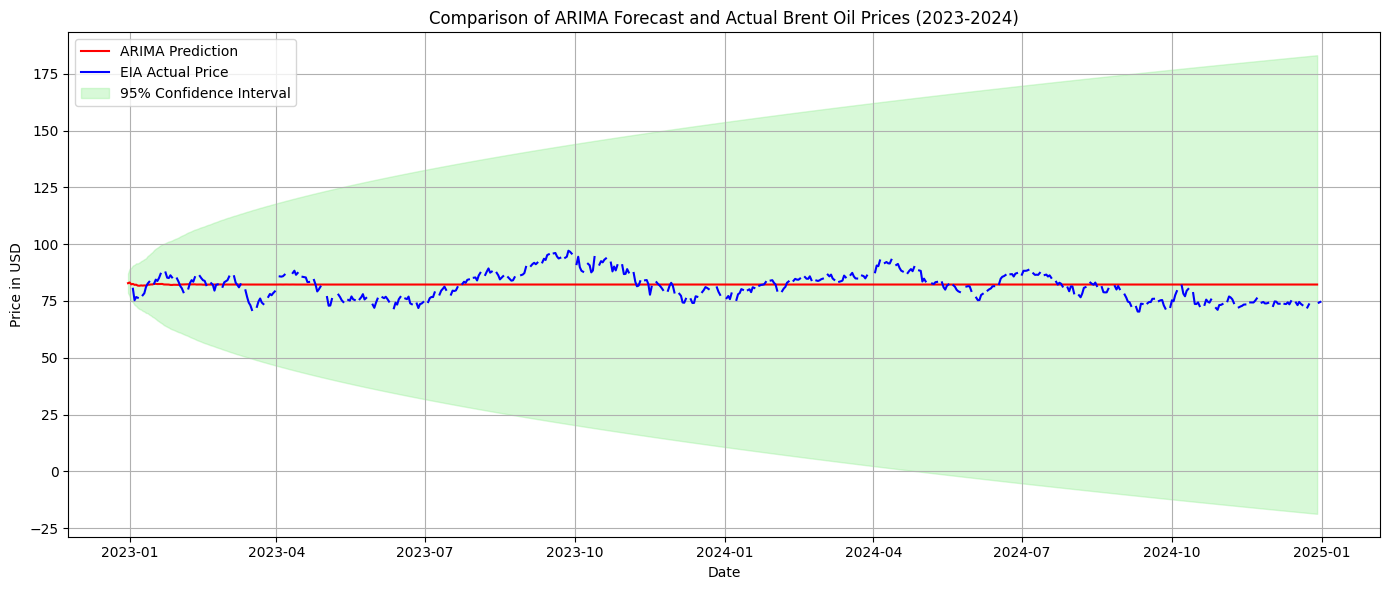

In [ ]:
plt.figure(figsize=(14, 6))

# Draw the predicted prices from the ARIMA model
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='ARIMA Prediction')

# Draw the actual Brent prices from EIA data
plt.plot(actual_future.index, actual_future['Europe_Brent_Spot_Price_FOB'], color='blue', label='EIA Actual Price')

# Confidence interval
conf_int.index = forecast_df.index
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.35, label='95% Confidence Interval')

# Add titles and labels
plt.title("Comparison of ARIMA Forecast and Actual Brent Oil Prices (2023-2024)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


# Part2 :LSTM Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

# Load your dataset
data = df[['Price']].copy()
data.index = pd.to_datetime(data.index)

In [ ]:
# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)


In [ ]:
# Split data into train and test sets

test_size = 730
split = len(X) - test_size

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 480, Test size: 125


In [ ]:
# Create and train LSTM model with early stopping
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0487 - val_loss: 0.0659
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0022 - val_loss: 0.0061
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0014 - val_loss: 0.0104
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
test_dates length: 125, y_test_inverse length: 125


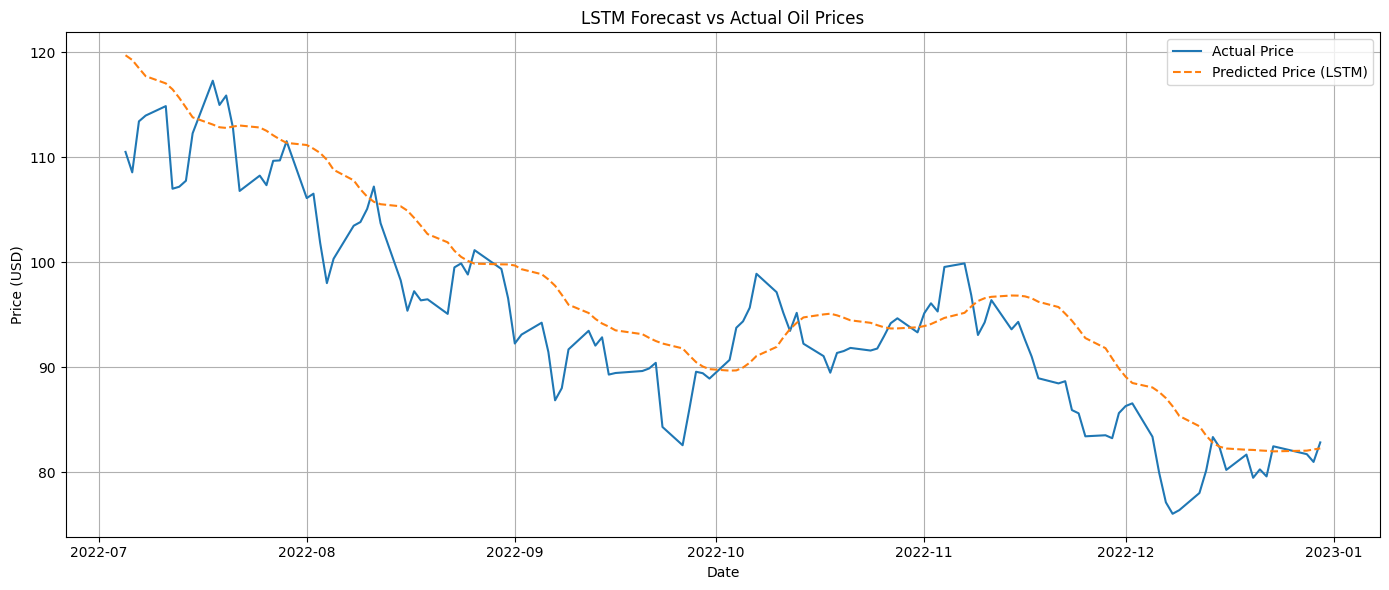

RMSE: 5.12
MAE : 4.15
R²  : 0.7243


In [ ]:
# Predict using the trained LSTM model
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Create correct date index for test set
test_dates = data.index[-len(y_test):]

print(f"test_dates length: {len(test_dates)}, y_test_inverse length: {len(y_test_inverse)}")
assert len(test_dates) == len(y_test_inverse), "Mismatch in test_dates and y_test_inverse length"

# Arrays for plotting
y_true = y_test_inverse.flatten()
y_pred_plot = y_pred_inverse.flatten()

# Plot
plt.figure(figsize=(14,6))
plt.plot(test_dates, y_true, label='Actual Price')
plt.plot(test_dates, y_pred_plot, label='Predicted Price (LSTM)', linestyle='--')
plt.title("LSTM Forecast vs Actual Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")


In [ ]:
future_preds = []
last_seq = scaled_data[-window_size:]

for _ in range(730):
    pred_input = last_seq.reshape(1, window_size, 1)
    pred = model.predict(pred_input, verbose=0)[0, 0]
    future_preds.append(pred)
    last_seq = np.append(last_seq[1:], pred)

# Inverse transform
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=730)


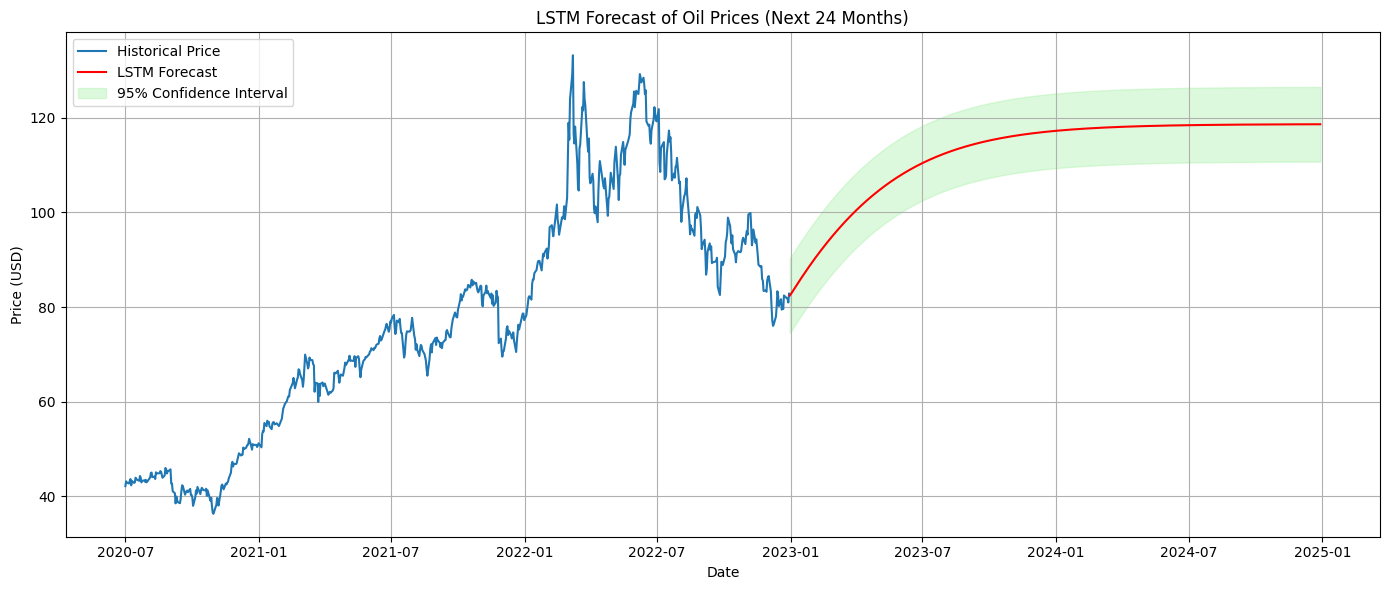

In [ ]:
# Calculate residuals
residuals = y_test_inverse.flatten() - y_pred_inverse.flatten()
std_dev = np.std(residuals)

upper_bound = future_preds.flatten() + 1.96 * std_dev
lower_bound = future_preds.flatten() - 1.96 * std_dev

plt.figure(figsize=(14,6))
plt.plot(data.index, data['Price'], label='Historical Price')
plt.plot(future_dates, future_preds, label='LSTM Forecast', color='red')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.3, label='95% Confidence Interval')
plt.title("LSTM Forecast of Oil Prices (Next 24 Months)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


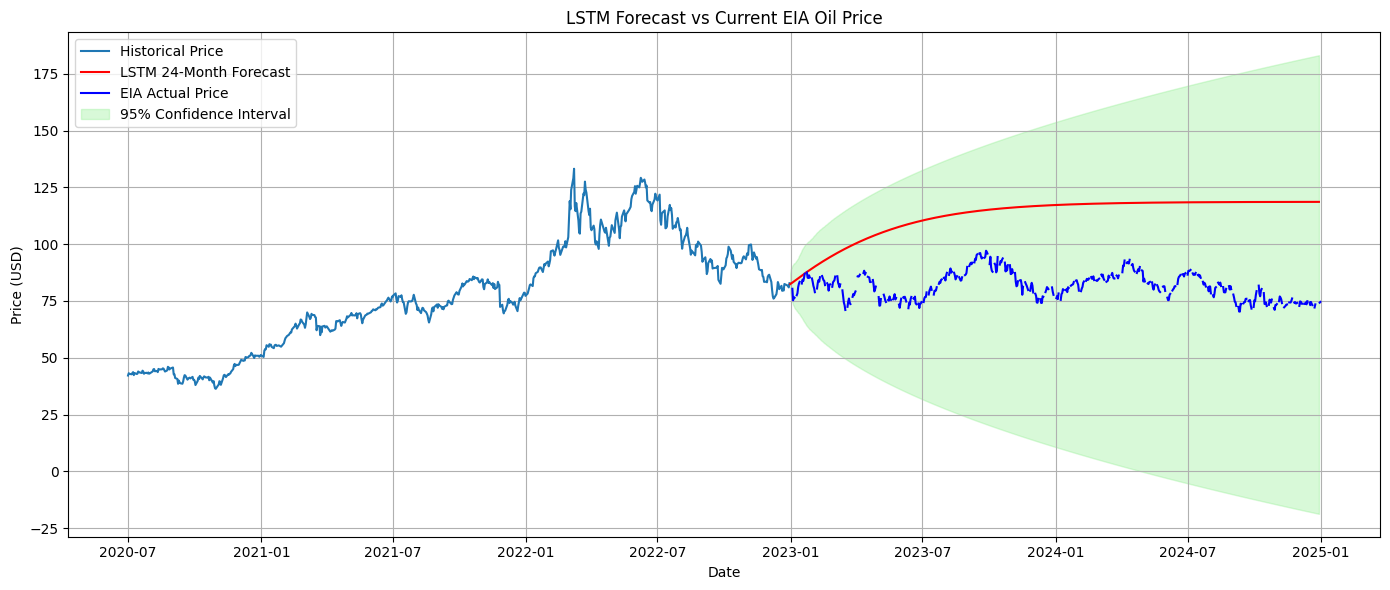

In [ ]:
# Plot forecast with historical + current actual price
plt.figure(figsize=(14,6))
plt.plot(data.index, data['Price'], label='Historical Price')
plt.plot(future_dates, future_preds, label='LSTM 24-Month Forecast', color='red')

# Actual Brent prices from EIA data
plt.plot(actual_future.index, actual_future['Europe_Brent_Spot_Price_FOB'], color='blue', label='EIA Actual Price')

# Confidence interval
conf_int.index = forecast_df.index
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.35, label='95% Confidence Interval')

# Plot
plt.title("LSTM Forecast vs Current EIA Oil Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
